In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read out data from "sn.dat" to array "SN_arr"
sn_dat = open("sn.dat", 'r')

SN = sn_dat.readlines()

sn_dat.close()

SN_arr = np.zeros((2, 16))

i = 0

for line in SN:
    string = line
    _, JD, Mag, dMag = line.split()
    if JD == "JD":
        continue
    SN_arr[0][i] = JD; SN_arr[1][i] = Mag
    i += 1
    
    cnt = (SN_arr[0][15] - SN_arr[0][0]) / 100

In [3]:
#data is array with arr[x & y][num of data] : arr[0][] = x, arr[1][] = y
def Lagrange_interpolation(data, x):
    y = 0
    
    for i in range(len(data[0])):
        up = 1; down = 1
        for j in range(len(data[0])):
            if i == j:
                continue
            up *= (x - data[0][j])
            down *= (data[0][i] - data[0][j])
        y += (data[1][i] * up / down)
    
    return y

In [4]:
# Create data with Lagrange interpolation
result_lag = np.zeros((2, 101))

x0 = SN_arr[0][0]

for _ in range(0, 101):
    result_lag[0][_] = x0
    result_lag[1][_] = Lagrange_interpolation(SN_arr, x0)
    x0 += cnt

C:\Users\AGN\AppData\Local\Temp\ipykernel_2536\215152268.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


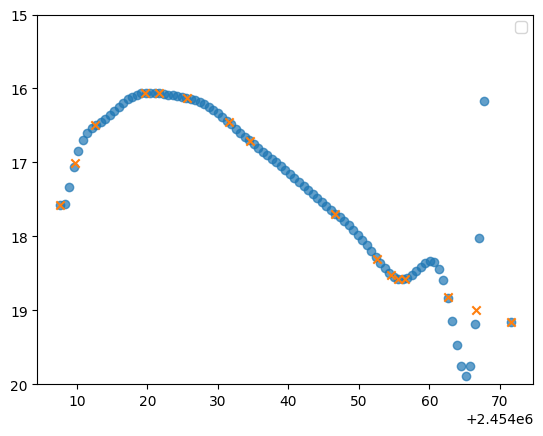

In [5]:
# Plotting results by Lagrange interpolation
plt.figure()
plt.ylim(15, 20)
plt.gca().invert_yaxis()
plt.scatter(result_lag[0], result_lag[1], marker='o', alpha=0.7)
plt.scatter(SN_arr[0], SN_arr[1], marker='x')
plt.legend()


In [6]:
dmag = np.random.normal(0, 0.1, size=16)
print(dmag)

[-0.00826477  0.07075651 -0.13585763 -0.08870062 -0.0333381  -0.05086806
  0.01069958 -0.15977529 -0.11194653  0.07254573  0.10287322  0.11880604
  0.00165844 -0.01159439  0.01274129 -0.06467706]


In [7]:
result_lag_noise = np.zeros((2, 101))

SN_interrupt = SN_arr.copy()
SN_interrupt[1] += dmag

x0 = SN_interrupt[0][0]

for _ in range(0, 101):
    result_lag_noise[0][_] = x0
    result_lag_noise[1][_] = Lagrange_interpolation(SN_interrupt, x0)
    x0 += cnt

C:\Users\AGN\AppData\Local\Temp\ipykernel_2536\2873904538.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


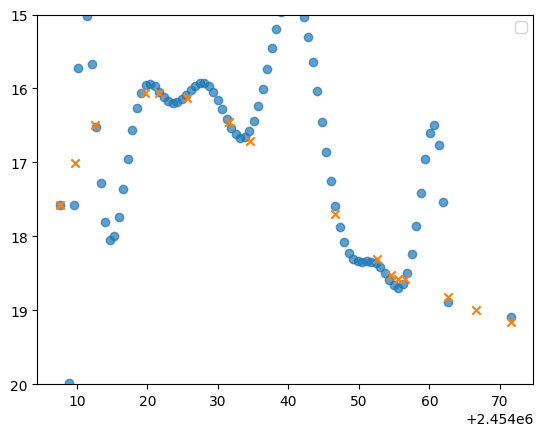

In [8]:
plt.figure()
plt.ylim(15, 20)
plt.gca().invert_yaxis()
plt.scatter(result_lag_noise[0], result_lag_noise[1], marker='o', alpha=0.7)
plt.scatter(SN_arr[0], SN_arr[1], marker='x')
plt.legend()

In [22]:
# difference between noise & without noise
RMSE_lag = np.sqrt(np.mean((result_lag[1] - result_lag_noise[1])**2))
print(RMSE_lag)

16.668777828262552


In [10]:
# definition of Neville's Algorithm for interpolation
# x is position to do interpolation
# data is 2D array [x & y][num of datas] with "sn.dat"
# n is # of points to use
# sp is start point of interpolation
# 재귀함수로 구현됨.

def Neville_algorithm(data, x, start, end):
    if (end - start) == 0:
        return data[1][start]
    
    return ((x - data[0][end])*(Neville_algorithm(data, x, start, end - 1)) 
            + ((data[0][start] - x) * Neville_algorithm(data, x, start + 1, end))) / (data[0][start] - data[0][end])

In [11]:
result_nev = np.zeros((4, 2, 101))

In [12]:
adder = [2, 4, 6, 15]

for n in range(4):
    cur = 0
    x0 = SN_arr[0][0]
    for _ in range(len(result_nev[n][0])):
        if ((cur + adder[n] < 15) and (SN_arr[0][cur + 1] < x0)): # Move intepolation position bin by bin. At the endpoint, don't change current position. (ex. cur == 14)
            cur += 1
        result_nev[n][0][_] = x0
        result_nev[n][1][_] = Neville_algorithm(SN_arr, x0, cur, cur+adder[n])
        x0 += cnt
    

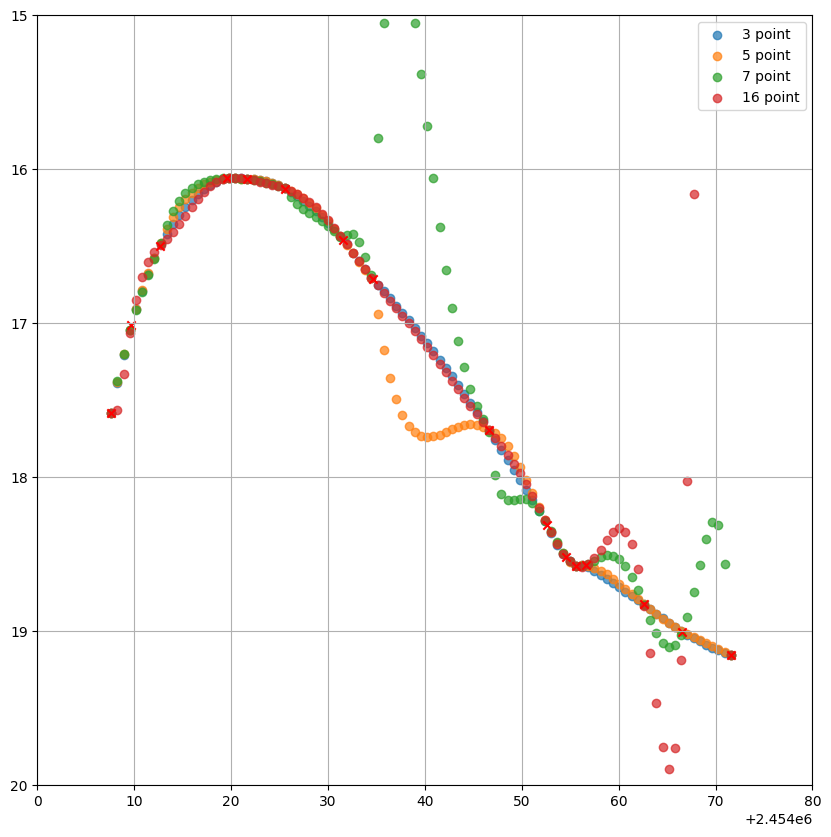

In [13]:
# Plotting results by Lagrange interpolation
label = ['3 point', '5 point', '7 point', '16 point']
plt.figure(figsize=(10, 10))
plt.ylim(15, 20)
plt.xlim(2.454*10**6, 2.45408*10**6)
plt.grid()
plt.gca().invert_yaxis()
for _ in range(4):
    plt.scatter(result_nev[_][0], result_nev[_][1], marker='o', alpha=0.7, label=label[_])
plt.scatter(SN_arr[0], SN_arr[1], marker='x', color='red')
plt.legend()

In [14]:
#Gaussian noise 가내수공업
noise = np.random.normal(0, 0.1, size=16)
print(noise)

[ 0.06586402  0.01820488  0.06782153  0.01608462 -0.02667878 -0.00670644
  0.17730889  0.05394134  0.07026422  0.05398952 -0.07971994  0.09250192
 -0.09562624 -0.04701696 -0.11578536 -0.09795367]


In [15]:
# Check out when data has noise.
# use Gaussian noise from above. set as "noise" with 1D, 16 float array
SN_arr_noise = np.zeros((2, 16))
SN_arr_noise += SN_arr
SN_arr_noise[1] += noise

#define array type data to save results of calculation
result_nev_noise = np.zeros((4, 2, 101))
result_nev_noise

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [16]:
adder_noise = [2, 4, 6, 15]

for k in range(4):
    x0 = SN_arr_noise[0][0]
    cur = 0
    for _ in range(len(result_nev_noise[k][0])):
        if ((cur + adder_noise[k] < 15) and (SN_arr_noise[0][cur + 1] < x0)):
            cur += 1
        result_nev_noise[k][0][_] = x0
        result_nev_noise[k][1][_] = Neville_algorithm(SN_arr_noise, x0, cur, cur+adder_noise[k])
        x0 += cnt    

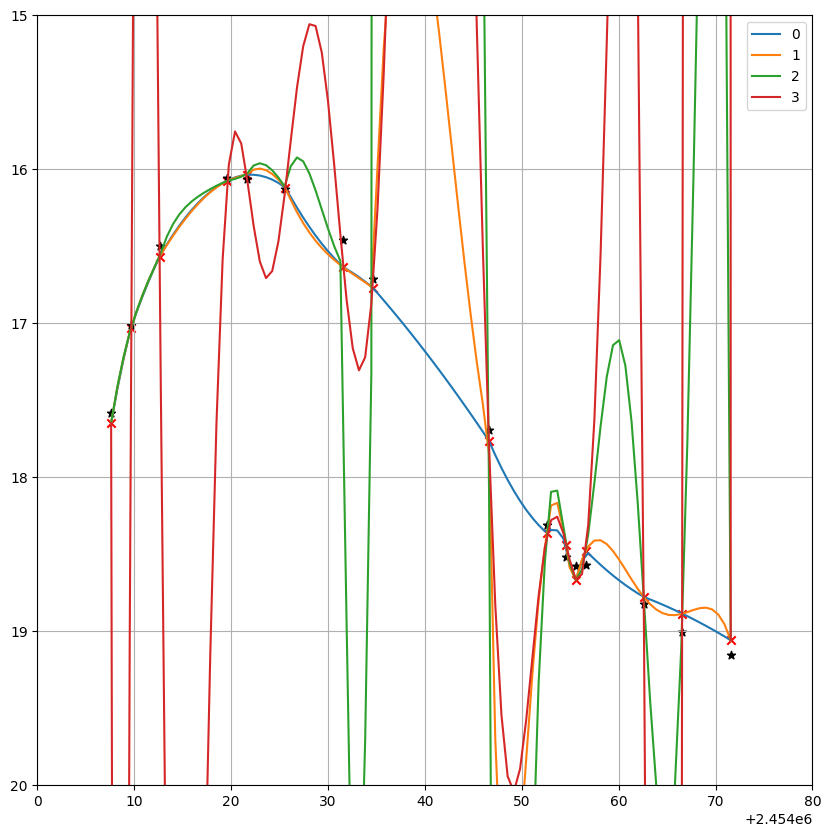

In [17]:
plt.figure(figsize=(10, 10))
plt.grid(visible=True)
plt.ylim(15, 20)
plt.xlim(2.454*10**6, 2.45408*10**6)
plt.gca().invert_yaxis()
for _ in range(4):
    plt.plot(result_nev_noise[_][0], result_nev_noise[_][1], label=_)
plt.scatter(SN_arr_noise[0], SN_arr_noise[1], marker='x', color='red')
plt.scatter(SN_arr[0], SN_arr[1], marker='*', color='black')
plt.legend()

As a result, the less usage of data for interpolation gave more precise result with smooth graph.
More and more data used for interpolation, they gave much overfitted results.

In [21]:
RMSE = np.zeros(4)

for k in range(4):
    RMSE[k] = np.sqrt(np.mean(np.square(result_nev_noise[k][1] - result_nev[k][1])))
    
print(RMSE)

[ 0.08618048  1.23197716 44.66801419 65.46236919]
